# Derivative of Matrix

## import library

In [361]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

In [362]:
I = img.imread('sample.jpg')

## check the size of image

In [363]:
I.shape

(679, 683, 3)

## convert the input image into gray scale if it is color

In [364]:

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    
    gray = 0.3333* r + 0.3333 * g + 0.3333 * b

    return gray 
    
if I.shape[2] == 3: 
     I = rgb2gray(I)


## normalize input image so that the range of image is $[0, 1]$

In [365]:
I /= 255
print(I)

[[0.42348706 0.41956588 0.42348706 ... 0.05881765 0.90971294 0.9999    ]
 [0.42740824 0.42348706 0.41956588 ... 0.05881765 0.90971294 0.9999    ]
 [0.43917176 0.42740824 0.41956588 ... 0.05881765 0.90971294 0.9999    ]
 ...
 [0.42348706 0.43525059 0.40780235 ... 0.08626588 0.90971294 0.9999    ]
 [0.41956588 0.42348706 0.39996    ... 0.08626588 0.90579176 0.9999    ]
 [0.41564471 0.40780235 0.38427529 ... 0.08234471 0.90187059 0.9999    ]]


```git commit -a -m "load image" ``` \
```git push origin master```

## generate a matrix to compute the derivative in $x$-direction

In [366]:

def dif1_matrix(x):
    dif_now = np.diag(np.ones(683)*-1)
     
    dif_pre_ones = np.ones(683-1) 
    dif_pre = np.diag(dif_pre_ones, k=-1) 
     
    dif = dif_now + dif_pre
    
    return dif
Dx =  dif1_matrix(I)
print(Dx)


[[-1.  0.  0. ...  0.  0.  0.]
 [ 1. -1.  0. ...  0.  0.  0.]
 [ 0.  1. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  1. -1.  0.]
 [ 0.  0.  0. ...  0.  1. -1.]]


## compute the derivative of $I$ with respect to $x$-direction

In [367]:
Ix = np.dot(I,Dx)
print (Ix)

[[-0.00392118  0.00392118  0.00784235 ...  0.85089529  0.09018706
  -0.9999    ]
 [-0.00392118 -0.00392118  0.00784235 ...  0.85089529  0.09018706
  -0.9999    ]
 [-0.01176353 -0.00784235  0.00392118 ...  0.85089529  0.09018706
  -0.9999    ]
 ...
 [ 0.01176353 -0.02744824 -0.04313294 ...  0.82344706  0.09018706
  -0.9999    ]
 [ 0.00392118 -0.02352706 -0.02744824 ...  0.81952588  0.09410824
  -0.9999    ]
 [-0.00784235 -0.02352706 -0.01176353 ...  0.81952588  0.09802941
  -0.9999    ]]


```git commit -a -m "compute the derivative in x-direction"``` \
```git push origin master```

## generate a matrix to compute the derivative in $y$-direction

In [368]:
def dif2_matrix(Y):
   
    dif_now = np.diag(np.ones(679)*-1)
     
    dif_pre_ones = np.ones(679-1) 
    dif_pre = np.diag(dif_pre_ones, k=1)
    dif = dif_now + dif_pre
    
    return dif
Dy =  dif2_matrix(I)
print(Dy)


[[-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  1.  0.]
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]]


## compute the derivative of $I$ with respect to $y$-direction

In [369]:
Iy = np.dot(Dy,I)
print(Iy)

[[ 0.00392118  0.00392118 -0.00392118 ...  0.          0.
   0.        ]
 [ 0.01176353  0.00392118  0.         ...  0.          0.
   0.        ]
 [ 0.00784235  0.00392118  0.00392118 ...  0.          0.
   0.        ]
 ...
 [-0.00392118 -0.01176353 -0.00784235 ...  0.         -0.00392118
   0.        ]
 [-0.00392118 -0.01568471 -0.01568471 ... -0.00392118 -0.00392118
   0.        ]
 [-0.41564471 -0.40780235 -0.38427529 ... -0.08234471 -0.90187059
  -0.9999    ]]


```git commit -a -m "compute the derivative in y-direction"``` \
```git push origin master```

## compute $L_2^2$ of the gradient of $I$

In [370]:
Ix2=np.square(Ix)
print(Ix)
print(Ix2)



[[-0.00392118  0.00392118  0.00784235 ...  0.85089529  0.09018706
  -0.9999    ]
 [-0.00392118 -0.00392118  0.00784235 ...  0.85089529  0.09018706
  -0.9999    ]
 [-0.01176353 -0.00784235  0.00392118 ...  0.85089529  0.09018706
  -0.9999    ]
 ...
 [ 0.01176353 -0.02744824 -0.04313294 ...  0.82344706  0.09018706
  -0.9999    ]
 [ 0.00392118 -0.02352706 -0.02744824 ...  0.81952588  0.09410824
  -0.9999    ]
 [-0.00784235 -0.02352706 -0.01176353 ...  0.81952588  0.09802941
  -0.9999    ]]
[[1.53756249e-05 1.53756249e-05 6.15024997e-05 ... 7.24022802e-01
  8.13370558e-03 9.99800010e-01]
 [1.53756249e-05 1.53756249e-05 6.15024997e-05 ... 7.24022802e-01
  8.13370558e-03 9.99800010e-01]
 [1.38380624e-04 6.15024997e-05 1.53756249e-05 ... 7.24022802e-01
  8.13370558e-03 9.99800010e-01]
 ...
 [1.38380624e-04 7.53405621e-04 1.86045061e-03 ... 6.78065059e-01
  8.13370558e-03 9.99800010e-01]
 [1.53756249e-05 5.53522497e-04 7.53405621e-04 ... 6.71622672e-01
  8.85635995e-03 9.99800010e-01]
 [6.1502

In [371]:
norm_gradient =  np.square(Ix) + np.square(Iy)
print(norm_gradient)


[[3.07512498e-05 3.07512498e-05 7.68781246e-05 ... 7.24022802e-01
  8.13370558e-03 9.99800010e-01]
 [1.53756249e-04 3.07512498e-05 6.15024997e-05 ... 7.24022802e-01
  8.13370558e-03 9.99800010e-01]
 [1.99883124e-04 7.68781246e-05 3.07512498e-05 ... 7.24022802e-01
  8.13370558e-03 9.99800010e-01]
 ...
 [1.53756249e-04 8.91786245e-04 1.92195311e-03 ... 6.78065059e-01
  8.14908120e-03 9.99800010e-01]
 [3.07512498e-05 7.99532496e-04 9.99415619e-04 ... 6.71638047e-01
  8.87173558e-03 9.99800010e-01]
 [1.72822024e-01 1.66856282e-01 1.47805882e-01 ... 6.78403322e-01
  8.22980323e-01 1.99960002e+00]]


## define functions for the visualization

In [407]:
def plot_image(I):
    
    plt.figure(figsize=(11,11))
    plt.imshow(I, cmap='gray')
    plt.title('input image')
    plt.axis('off')
        
def plot_image_derivative_x(Ix):
    

    plt.figure(figsize=(10,10))
    plt.imshow(np.log(Ix), cmap='gray')
    plt.title('image derivative of x')
    plt.axis('off')

    
def plot_image_derivative_y(Iy):
    
    plt.figure(figsize=(10,10))
    

    plt.imshow(np.log(Iy), cmap='gray' )
    plt.title('image derivative of y')
    plt.axis('off')

    
def plot_norm_gradient(norm_gradient):

    plt.figure(figsize=(10,10))
    plt.imshow(np.log(norm_gradient), cmap='gray')
    plt.title('norm gradient')
    plt.axis('off')

```git commit -a -m "define functions for the visualization"``` \
```git push origin master```

# ###################################################################

# # results

# ###################################################################

# # 01. plot the input image in gray scale

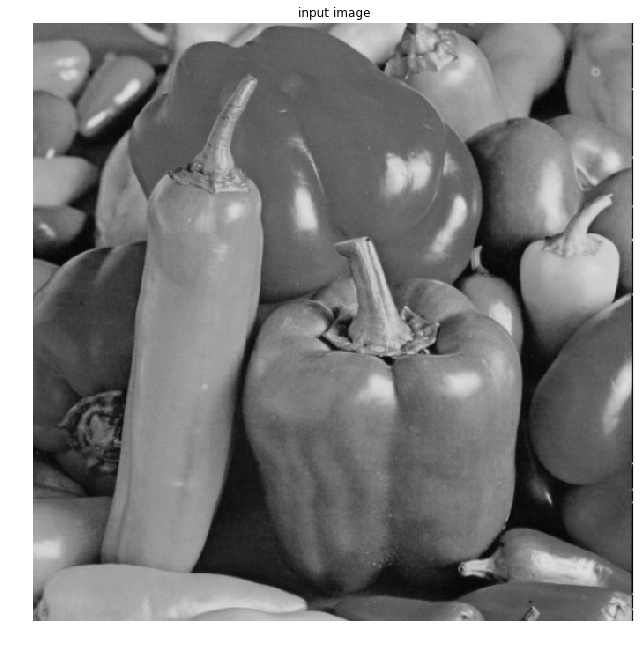

In [408]:
plot_image(I)

# # 02. plot the derivative $I_x$ of input image in x-direction

C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


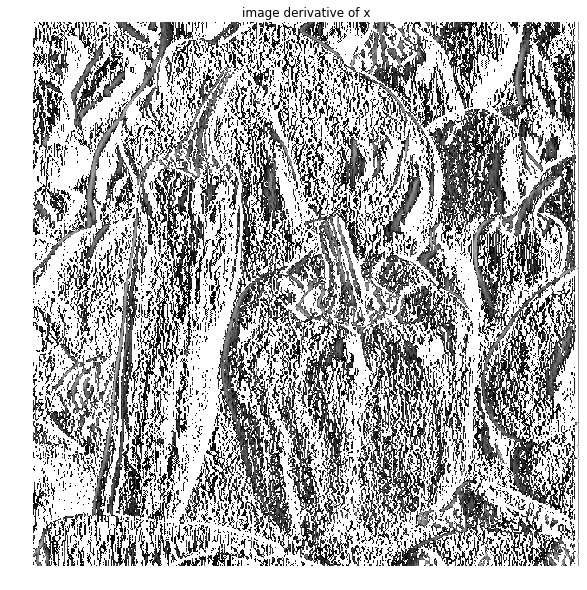

In [409]:
plot_image_derivative_x(Ix)

# # 03. plot the derivative $I_y$ of input image in y-direction

C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log


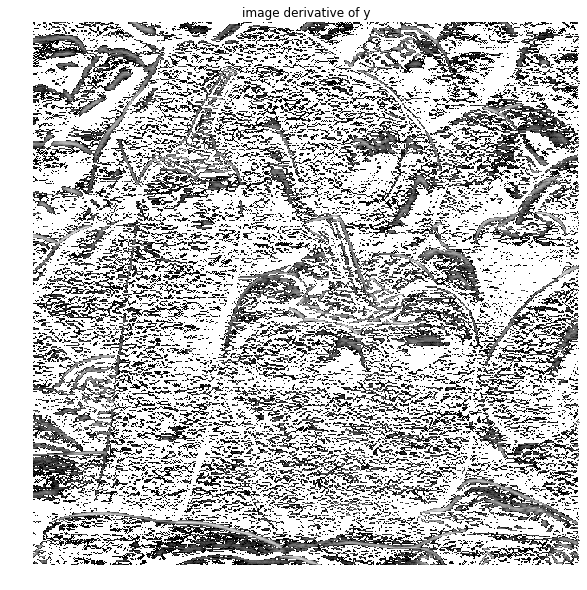

In [410]:
plot_image_derivative_y(Iy)

# # 04. plot $L_2^2$ norm $I_x^2 + I_y^2$ of the gradient of input image

C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


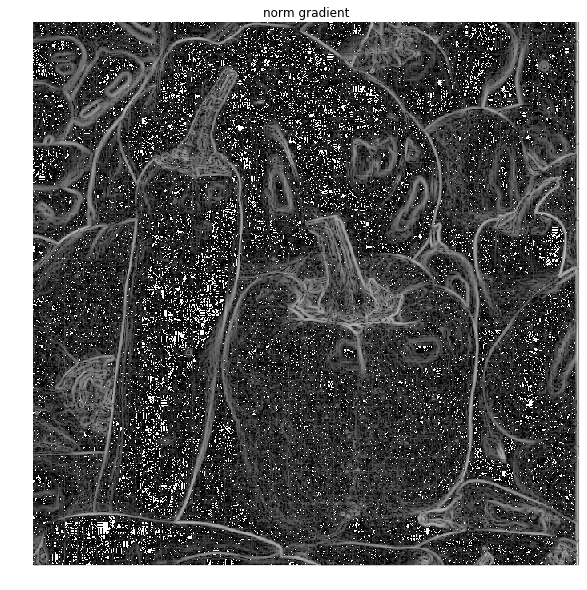

In [406]:
plot_norm_gradient(norm_gradient)